In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [54]:
supermarket = pd.read_csv('/home/amybirdee/hobby_projects/supermarket_sales/supermarket_sales.csv', delimiter = ',')

In [55]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [56]:
#renaming columns
supermarket = supermarket.rename(columns = {'Invoice ID': 'invoice_id', 'Branch': 'branch', 'City': 'city', 'Customer type':
                                         'customer_type', 'Gender': 'gender', 'Product line': 'product_line', 'Unit price':
                                         'unit_price', 'Quantity': 'quantity', 'Tax 5%': 'tax_5%', 'Total': 'total_price',
                                         'Date': 'date', 'Time': 'time', 'Payment': 'payment_method', 'cogs': 
                                          'cost_of_goods_sold', 'gross margin percentage': 'gross_margin_percentage', 
                                          'gross income': 'gross_income', 'Rating': 'customer_rating'})

In [57]:
supermarket.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total_price,date,time,payment_method,cost_of_goods_sold,gross_margin_percentage,gross_income,customer_rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [58]:
#datatypes all seem fine apart from date and time which are objects but we won't need these fields in this analysis
#no null values to deal with
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5%                   1000 non-null   float64
 9   total_price              1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment_method           1000 non-null   object 
 13  cost_of_goods_sold       1000 non-null   float64
 14  gross_margin_percentage  

In [59]:
#getting an overview of the data - invoice_id is a unique column so can be dropped. There are three branches in three 
#cities so city column can also be dropped
supermarket.describe(include = 'all')

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total_price,date,time,payment_method,cost_of_goods_sold,gross_margin_percentage,gross_income,customer_rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,288-62-1085,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,14:42,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


In [60]:
#dropping unnecessary columns
supermarket = supermarket.drop(['invoice_id', 'city', 'date', 'time'], axis = 1)

In [61]:
supermarket.head()

,branch,customer_type,gender,product_line,unit_price,quantity,tax_5%,total_price,payment_method,cost_of_goods_sold,gross_margin_percentage,gross_income,customer_rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [62]:
#grouping by branch and customer type to see which branch/type generated most sales 
sales_customer_type = supermarket.groupby(['branch', 'customer_type']).total_price.sum().round().to_frame().reset_index()
sales_customer_type

,branch,customer_type,total_price
0,A,Member,53637.0
1,A,Normal,52563.0
2,B,Member,53705.0
3,B,Normal,52493.0
4,C,Member,56881.0
5,C,Normal,53687.0


In [63]:
#converting values to integer to remove the 0 decimal - this will be needed for chart labels
sales_customer_type['total_price'] = sales_customer_type['total_price'].apply(int)

## Exploratory data analysis

In [64]:
#creating pivot table showing supermarket members and non-members
customer_type_pivot = sales_customer_type.pivot_table(columns = 'customer_type',
                                             index = 'branch',
                                             values = 'total_price').reset_index()
customer_type_pivot

customer_type,branch,Member,Normal
0,A,53637,52563
1,B,53705,52493
2,C,56881,53687


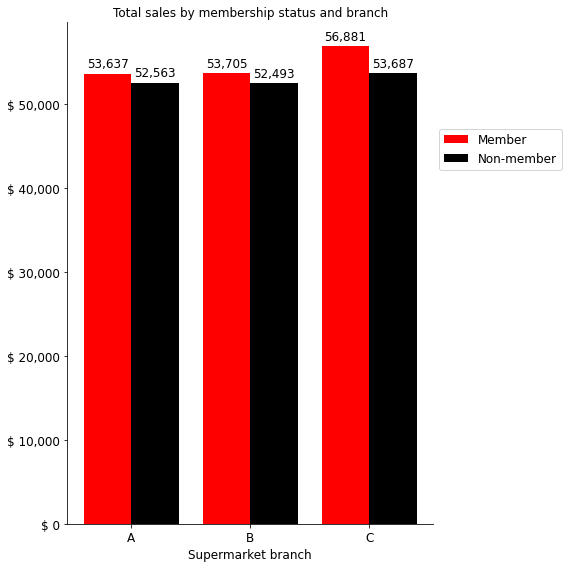

In [65]:
#plotting data on barchart. Majority sales by members in all cases with largest sales volume at branch C
num_bars = 3
width = 0.4

branch_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

bar_1 = ax.bar(branch_bars, customer_type_pivot.Member, width, color = 'red', label = 'Member')
bar_2 = ax.bar(branch_bars + width, customer_type_pivot.Normal, width, color = 'black', label = 'Non-member')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#setting y_tick values to have commas to separate 1000s and also a $ sign in front
value_format = '${x: ,.0f}'
tick = mtick.StrMethodFormatter(value_format)
ax.yaxis.set_major_formatter(tick)
plt.yticks(fontsize = 12)

#setting x_ticks
ax.set_xticks(branch_bars + width / 2)
ax.set_xticklabels(customer_type_pivot.branch, fontsize = 12)
ax.set_xlabel('Supermarket branch', fontsize = 12)


#adding a label to each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        #the '{:,}' command adds a thousand separator to the labels
        ax.annotate('{:,}'.format(height),\
                   xy = (bar.get_x() + bar.get_width() / 2, height), \
                   #shows label position on x and y axis
                   xytext = (0, 3), \
                   textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 12)
        
                
autolabel(bar_1)
autolabel(bar_2)

#bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((bar_1, bar_2), ('Member', 'Non-member'), bbox_to_anchor = (1.0, 0.8), fontsize = 12)
plt.title('Total sales by membership status and branch', fontsize = 12, y = 1.0)

plt.tight_layout()

plt.savefig('sales_customer_type')

In [66]:
#grouping by branch and gender to see which branch/gender generated most sales 
sales_gender = supermarket.groupby(['branch', 'gender']).total_price.sum().round().to_frame().reset_index()
sales_gender

,branch,gender,total_price
0,A,Female,53269.0
1,A,Male,52931.0
2,B,Female,52928.0
3,B,Male,53269.0
4,C,Female,61685.0
5,C,Male,48883.0


In [67]:
#converting values to integer to remove the 0 decimal - this will be needed for chart labels
sales_gender['total_price'] = sales_gender['total_price'].apply(int)

In [68]:
#creating pivot table showing males/female breakdown
gender_pivot = sales_gender.pivot_table(columns = 'gender',
                                             index = 'branch',
                                             values = 'total_price').reset_index()
gender_pivot

gender,branch,Female,Male
0,A,53269,52931
1,B,52928,53269
2,C,61685,48883


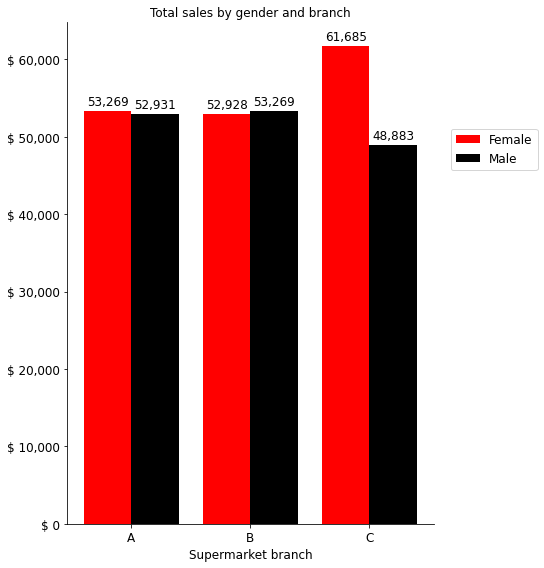

In [69]:
#plotting data on barchart. Females are by far the biggest spenders in Branch C
num_bars = 3
width = 0.4

branch_bars = np.arange(num_bars)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

bar_1 = ax.bar(branch_bars, gender_pivot.Female, width, color = 'red', label = 'Female')
bar_2 = ax.bar(branch_bars + width, gender_pivot.Male, width, color = 'black', label = 'Male')

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#setting y_tick values to have commas to separate 1000s and also a $ sign in front
value_format = '${x: ,.0f}'
tick = mtick.StrMethodFormatter(value_format)
ax.yaxis.set_major_formatter(tick)
plt.yticks(fontsize = 12)

#setting x_ticks
ax.set_xticks(branch_bars + width / 2)
ax.set_xticklabels(gender_pivot.branch, fontsize = 12)
ax.set_xlabel('Supermarket branch', fontsize = 12)
   
#using the function created in first chart to add labels to each bar                
autolabel(bar_1)
autolabel(bar_2)

#bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((bar_1, bar_2), ('Female', 'Male'), bbox_to_anchor = (1.3, 0.8), fontsize = 12)
plt.title('Total sales by gender and branch', fontsize = 12, y = 1.0)

plt.tight_layout()

plt.savefig('sales_gender')

In [70]:
#grouping by branch and product line to see which branch/product generated most sales 
sales_product = supermarket.groupby(['branch', 'product_line']).total_price.sum().round().to_frame().reset_index()
sales_product

,branch,product_line,total_price
0,A,Electronic accessories,18317.0
1,A,Fashion accessories,16333.0
2,A,Food and beverages,17163.0
3,A,Health and beauty,12598.0
4,A,Home and lifestyle,22417.0
5,A,Sports and travel,19373.0
6,B,Electronic accessories,17051.0
7,B,Fashion accessories,16413.0
8,B,Food and beverages,15215.0
9,B,Health and beauty,19981.0


In [71]:
#converting values to integer to remove the 0 decimal - this will be needed for chart labels if added
sales_product['total_price'] = sales_product['total_price'].apply(int)

In [72]:
#creating pivot table showing product breakdown
product_pivot = sales_product.pivot_table(columns = 'product_line',
                                             index = 'branch',
                                             values = 'total_price').reset_index()
product_pivot

product_line,branch,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,A,18317,16333,17163,12598,22417,19373
1,B,17051,16413,15215,19981,17549,19988
2,C,18969,21560,23767,16615,13896,15762


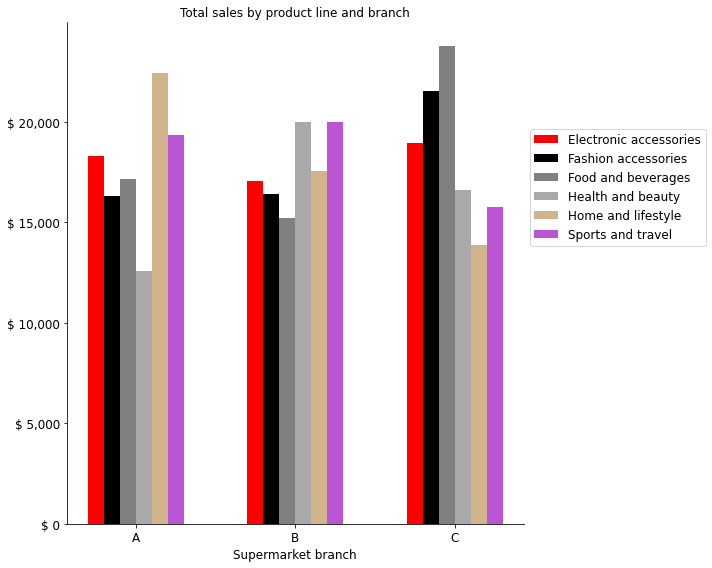

In [73]:
#plotting data on barchart. Food is biggest seller at Branch C and home and lifestyle in branch A
num_bars = 3
width = 0.1

branch_bars = np.arange(num_bars)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

bar_1 = ax.bar(branch_bars, product_pivot['Electronic accessories'], width, color = 'red')
bar_2 = ax.bar(branch_bars + 0.1, product_pivot['Fashion accessories'], width, color = 'black')
bar_3 = ax.bar(branch_bars + 0.2, product_pivot['Food and beverages'], width, color = 'grey')
bar_4 = ax.bar(branch_bars + 0.3, product_pivot['Health and beauty'], width, color = 'darkgrey')  
bar_5 = ax.bar(branch_bars + 0.4, product_pivot['Home and lifestyle'], width, color = 'tan')
bar_6 = ax.bar(branch_bars + 0.5, product_pivot['Sports and travel'], width, color = 'mediumorchid')    

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#setting y_tick values to have commas to separate 1000s and also a $ sign in front
value_format = '${x: ,.0f}'
tick = mtick.StrMethodFormatter(value_format)
ax.yaxis.set_major_formatter(tick)
plt.yticks(fontsize = 12)

#setting x_ticks
ax.set_xticks(branch_bars + (width * 5) / 2)
ax.set_xticklabels(product_pivot.branch, fontsize = 12)
ax.set_xlabel('Supermarket branch', fontsize = 12)
   

#bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((bar_1, bar_2, bar_3, bar_4, bar_5, bar_6), \
          ('Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', \
          'Home and lifestyle', 'Sports and travel'), bbox_to_anchor = (1.0, 0.8), fontsize = 12)
plt.title('Total sales by product line and branch', fontsize = 12, y = 1.0)

plt.tight_layout()
plt.savefig('sales_product')

In [74]:
#grouping by branch and product line to see which branch/product generated most sale counts
sales_product_count = supermarket.groupby(['branch', 'product_line']).quantity.sum().round().to_frame().reset_index()
sales_product_count

,branch,product_line,quantity
0,A,Electronic accessories,322
1,A,Fashion accessories,263
2,A,Food and beverages,313
3,A,Health and beauty,257
4,A,Home and lifestyle,371
5,A,Sports and travel,333
6,B,Electronic accessories,316
7,B,Fashion accessories,297
8,B,Food and beverages,270
9,B,Health and beauty,320


In [75]:
#creating pivot table showing product count breakdown
product_pivot_count = sales_product_count.pivot_table(columns = 'product_line',
                                             index = 'branch',
                                             values = 'quantity').reset_index()
product_pivot_count

product_line,branch,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,A,322,263,313,257,371,333
1,B,316,297,270,320,295,322
2,C,333,342,369,277,245,265


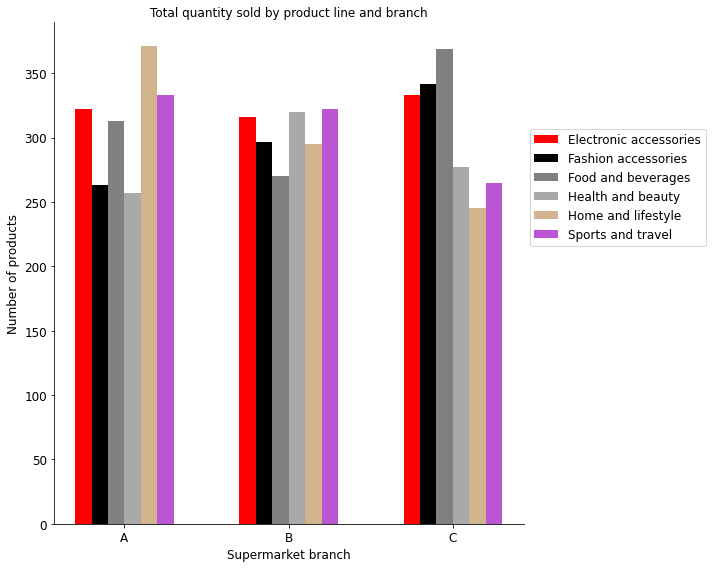

In [76]:
#plotting data on barchart. Food is biggest seller at Branch C and home and lifestyle in branch A - same as sales volume 
#chart

num_bars = 3
width = 0.1

branch_bars = np.arange(num_bars)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

bar_1 = ax.bar(branch_bars, product_pivot_count['Electronic accessories'], width, color = 'red')
bar_2 = ax.bar(branch_bars + 0.1, product_pivot_count['Fashion accessories'], width, color = 'black')
bar_3 = ax.bar(branch_bars + 0.2, product_pivot_count['Food and beverages'], width, color = 'grey')
bar_4 = ax.bar(branch_bars + 0.3, product_pivot_count['Health and beauty'], width, color = 'darkgrey')  
bar_5 = ax.bar(branch_bars + 0.4, product_pivot_count['Home and lifestyle'], width, color = 'tan')
bar_6 = ax.bar(branch_bars + 0.5, product_pivot_count['Sports and travel'], width, color = 'mediumorchid')    

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks(fontsize = 12)
plt.ylabel('Number of products', fontsize = 12)

#setting x_ticks
ax.set_xticks(branch_bars + (width * 5) / 2)
ax.set_xticklabels(product_pivot_count.branch, fontsize = 12)
ax.set_xlabel('Supermarket branch', fontsize = 12)
   

#bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((bar_1, bar_2, bar_3, bar_4, bar_5, bar_6), \
          ('Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', \
          'Home and lifestyle', 'Sports and travel'), bbox_to_anchor = (1.0, 0.8), fontsize = 12)
plt.title('Total quantity sold by product line and branch', fontsize = 12, y = 1.0)

plt.tight_layout()
plt.savefig('sales_product_count')

In [77]:
#grouping by branch and payment method to see which branch/method generated most sales
sales_payment_method = supermarket.groupby(['branch', 'payment_method']).total_price.sum().round().to_frame().reset_index()
sales_payment_method

,branch,payment_method,total_price
0,A,Cash,33781.0
1,A,Credit card,33095.0
2,A,Ewallet,39324.0
3,B,Cash,35339.0
4,B,Credit card,37345.0
5,B,Ewallet,33513.0
6,C,Cash,43086.0
7,C,Credit card,30327.0
8,C,Ewallet,37155.0


In [78]:
#converting values to integer to remove the 0 decimal - this will be needed for chart labels
sales_payment_method['total_price'] = sales_payment_method['total_price'].apply(int)

In [79]:
#creating pivot table showing payment breakdown
payment_method_pivot = sales_payment_method.pivot_table(columns = 'payment_method',
                                             index = 'branch',
                                             values = 'total_price').reset_index()
payment_method_pivot

payment_method,branch,Cash,Credit card,Ewallet
0,A,33781,33095,39324
1,B,35339,37345,33513
2,C,43086,30327,37155


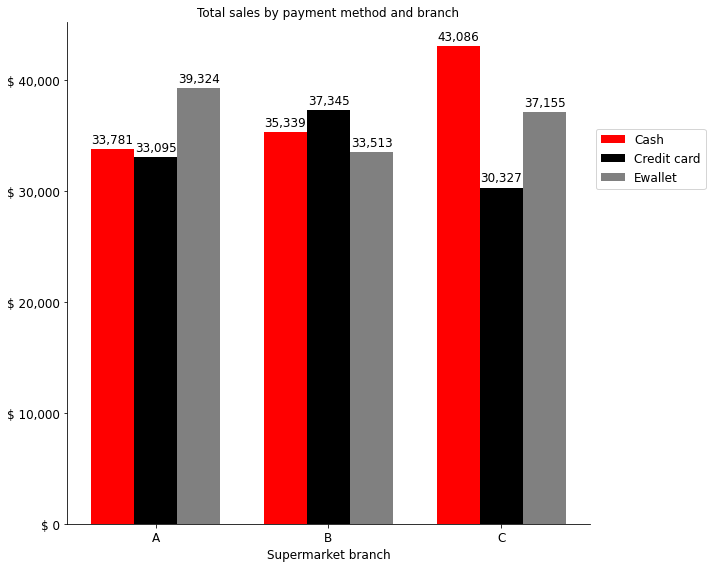

In [80]:
#plotting data on barchart. Cash mainly used in branch C with Ewallets close behind. Ewallets a popular choice at Branch A
num_bars = 3
width = 0.25

branch_bars = np.arange(num_bars)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()

bar_1 = ax.bar(branch_bars, payment_method_pivot['Cash'], width, color = 'red')
bar_2 = ax.bar(branch_bars + 0.25, payment_method_pivot['Credit card'], width, color = 'black')
bar_3 = ax.bar(branch_bars + 0.50, payment_method_pivot['Ewallet'], width, color = 'grey')   

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#setting y_tick values to have commas to separate 1000s and also a $ sign in front
value_format = '${x: ,.0f}'
tick = mtick.StrMethodFormatter(value_format)
ax.yaxis.set_major_formatter(tick)
plt.yticks(fontsize = 12)

#setting x_ticks
ax.set_xticks(branch_bars + (width * 2) / 2)
ax.set_xticklabels(payment_method_pivot.branch, fontsize = 12)
ax.set_xlabel('Supermarket branch', fontsize = 12)
   
#using the function created in first chart to add labels to each bar                
autolabel(bar_1)
autolabel(bar_2)
autolabel(bar_3)
    
#bbox_to_anchor shifts the legend along the x and y axis        
ax.legend((bar_1, bar_2, bar_3), ('Cash', 'Credit card', 'Ewallet'), bbox_to_anchor = (1.0, 0.8), fontsize = 12)

plt.title('Total sales by payment method and branch', fontsize = 12, y = 1.0)
plt.tight_layout()

plt.savefig('sales_payment_method')

In [81]:
#grouping by branch to see which branch had the highest average customer rating. Branch C had the highest rating by a small
#margin and this branch also generated the most sales
customer_rating = supermarket.groupby('branch').customer_rating.mean().round(1).to_frame().reset_index()
customer_rating

,branch,customer_rating
0,A,7.0
1,B,6.8
2,C,7.1


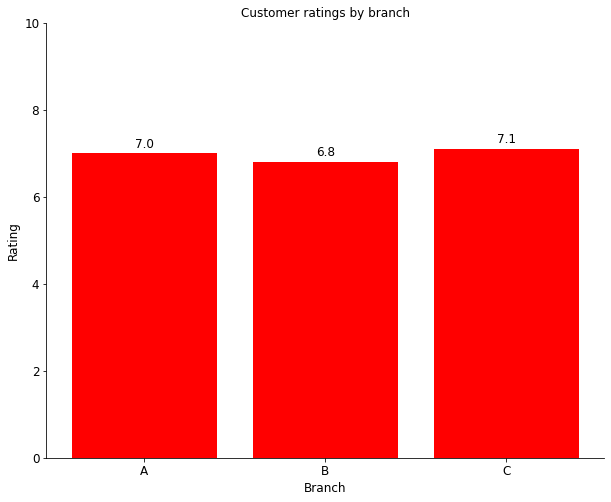

In [82]:
#creating chart
plt.figure(figsize = (10, 8))
ax = plt.subplot()
           
bar = plt.bar(customer_rating.branch, customer_rating.customer_rating, color = 'red')
plt.xticks(fontsize = 12)
plt.xlabel('Branch', fontsize = 12)
plt.yticks(fontsize =12)
plt.ylabel('Rating', fontsize = 12)
ax.set_ylim(0, 10)

#removing chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adding labels
autolabel(bar)

plt.title('Customer ratings by branch', fontsize = 12)
plt.savefig('customer_ratings')

## Preparing data for model

In [83]:
#preparing data for model - converting categorical variables to dummy data
supermarket_dummy = pd.get_dummies(supermarket)
supermarket_dummy.head()

,unit_price,quantity,tax_5%,total_price,cost_of_goods_sold,gross_margin_percentage,gross_income,customer_rating,branch_A,branch_B,...,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_method_Cash,payment_method_Credit card,payment_method_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,0,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,1,0,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,1,0,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,1,0,...,1,0,0,0,0,0,1,0,0,1


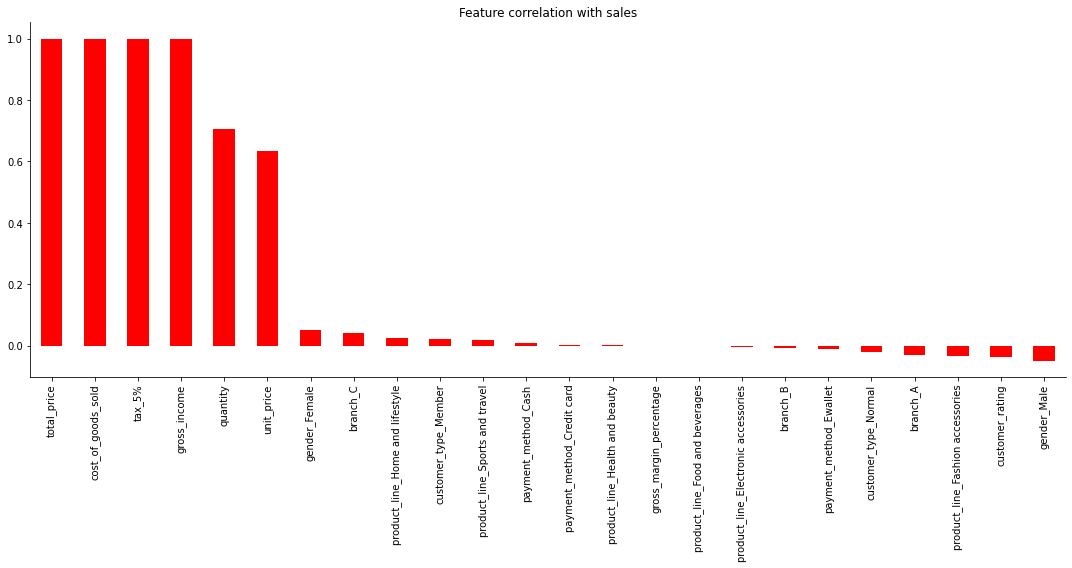

In [84]:
#plot correlations between target feature (sales) and all other variables
fig = plt.figure(figsize = (15,8))
ax = plt.subplot()
supermarket_dummy.corr()['total_price'].sort_values(ascending = False).plot(kind = 'bar', color = 'red')
plt.title('Feature correlation with sales', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('correlation_1')

In [85]:
#cost of good sold, tax and gross income have a perfect positive correlation with sales - removing these from data to 
#avoid multicollinearity
supermarket_dummy = supermarket_dummy.drop(['cost_of_goods_sold', 'tax_5%', 'gross_income'], axis = 1)
supermarket_dummy.head()

,unit_price,quantity,total_price,gross_margin_percentage,customer_rating,branch_A,branch_B,branch_C,customer_type_Member,customer_type_Normal,...,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_method_Cash,payment_method_Credit card,payment_method_Ewallet
0,74.69,7,548.9715,4.761905,9.1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,80.2200,4.761905,9.6,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,340.5255,4.761905,7.4,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,489.0480,4.761905,8.4,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,634.3785,4.761905,5.3,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


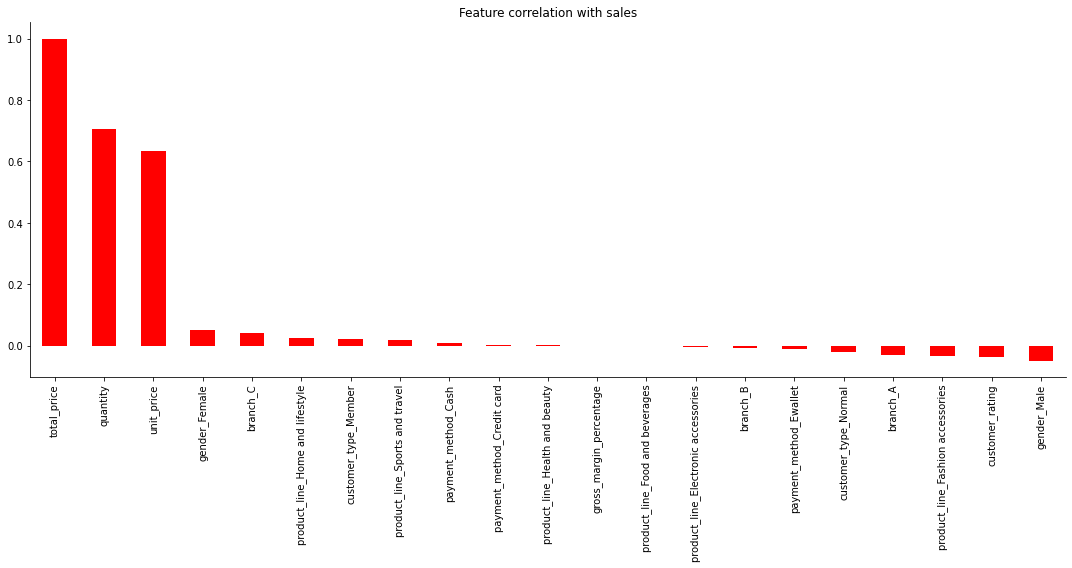

In [86]:
#re-plotting correlations between target feature (sales) and all other variables - quantity and unit price have the 
#highest correlation with sales, male gender and rating are least correlated
fig = plt.figure(figsize = (15,8))
ax = plt.subplot()
supermarket_dummy.corr()['total_price'].sort_values(ascending = False).plot(kind = 'bar', color = 'red')
plt.title('Feature correlation with sales', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('sales_correlation')

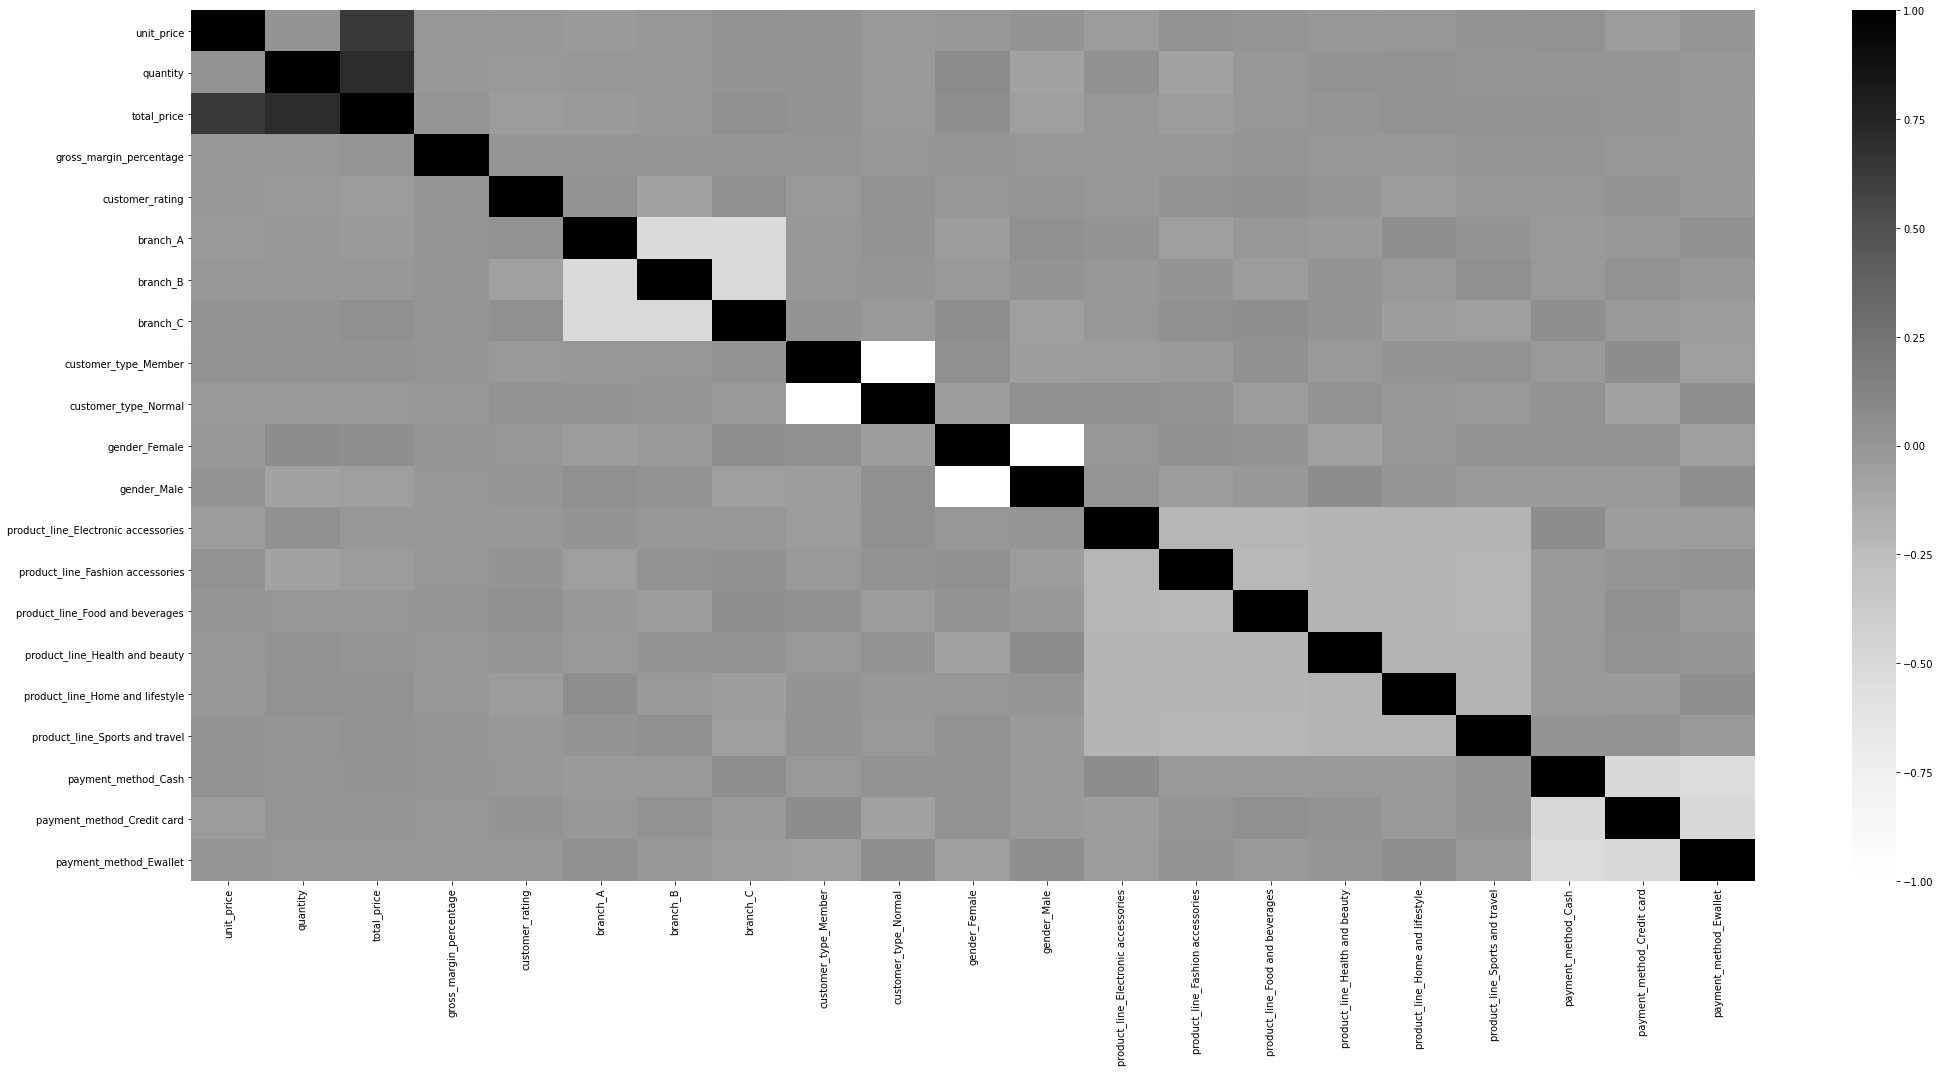

In [87]:
#plotting correlations on a heatmap
fig, ax = plt.subplots(figsize = (30,15))
sns.heatmap(supermarket_dummy.corr(), cmap = 'Greys')
plt.tight_layout()
plt.savefig('heatmap')

In [88]:
#saving the column names to a separate list for reassigning after scaling the data
supermarket_columns = supermarket_dummy.columns 

In [89]:
#scaling the numerical data

#instantiate the MinMaxScaler
scaler = MinMaxScaler()

#fit the scaler to data to transform the data. Converting to dataframe as well - otherwise it would be a NumPy array
supermarket_dummy = pd.DataFrame(scaler.fit_transform(supermarket_dummy))

#reassign the column names
supermarket_dummy.columns = supermarket_columns

supermarket_dummy.head()

,unit_price,quantity,total_price,gross_margin_percentage,customer_rating,branch_A,branch_B,branch_C,customer_type_Member,customer_type_Normal,...,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_method_Cash,payment_method_Credit card,payment_method_Ewallet
0,0.718847,0.666667,0.521616,0.0,0.850000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.057855,0.444444,0.067387,0.0,0.933333,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.403316,0.666667,0.319628,0.0,0.566667,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.535603,0.777778,0.463549,0.0,0.733333,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.848131,0.666667,0.604377,0.0,0.216667,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [90]:
#splitting the data into independent and dependent variables

y = supermarket_dummy.total_price

X = supermarket_dummy.drop('total_price', axis = 1)

In [91]:
#splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [92]:
#checking shape of training and testing sets - all 100 records are there
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


## Linear regression

In [93]:
#Initialise the linear regression model
lr = LinearRegression()

#fit the model
lr.fit(X_train, y_train)

#make predictions
prediction = lr.predict(X_test)

In [94]:
#evaluating model - r squared of 90% - very good fit
r2 = format(r2_score(y_test, prediction), '.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, prediction)), '.3f')
mae = format(mean_absolute_error(y_test, prediction), '.3f')

print('r2:', r2)
print('root mean squared error', rmse)
print('mean absolute error', mae)

r2: 0.902
root mean squared error 0.077
mean absolute error 0.057


In [95]:
#trying polynomial regression which is more complex and can fit non linear trends. Fitting with degree 2
polyfeat = PolynomialFeatures(degree = 2)
X_trainpoly = polyfeat.fit_transform(X_train) #this transforms data into an array
X_testpoly = polyfeat.fit_transform(X_test)

poly = LinearRegression().fit(X_trainpoly, y_train)

pred = poly.predict(X_testpoly)

In [96]:
#evaluating polynomial model - model has a prefect score!
r2 = format(r2_score(y_test, pred), '.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, pred)), '.3f')
mae = format(mean_absolute_error(y_test, pred), '.3f')

print('r2:', r2)
print('root mean squared error', rmse)
print('mean absolute error', mae)

r2: 1.000
root mean squared error 0.000
mean absolute error 0.000
